#### Loading Data from MongoDB

In [1]:
from pymongo import MongoClient
import pandas as pd

# Step 2: Connect to MongoDB
connection_string = "mongodb://localhost:27017/acts0324"
client = MongoClient(connection_string)
db = client["acts0324"]
collection = db["churn_data"]

# Step 3: Extract data from MongoDB

data = list(collection.find())

# Step 4: Convert to Pandas DataFrame
churn_df = pd.DataFrame(data)
churn_df = churn_df.drop(columns=['_id'])  # Optional: Drop the MongoDB '_id' field

# Step 5: Work with the DataFrame
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4445-ZJNMU,Male,0,No,No,9.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.30,918.75,No
1,7633-MVPUY,Male,0,Yes,No,57.0,Yes,No,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Electronic check,59.75,3450.15,No
2,3261-CQXOL,Female,0,Yes,Yes,71.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.45,1813.35,No
3,3748-FVMZZ,Male,0,No,No,4.0,No,No phone service,DSL,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,40.05,162.45,No
4,0096-FCPUF,Male,0,No,No,30.0,Yes,Yes,DSL,Yes,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,64.50,1888.45,No


### Feature Engineering

In [2]:
churn_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
churn_df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [5]:
# Identify categorical columns
categorical_columns = churn_df.select_dtypes(include=['object']).columns

print("Categorical columns:", categorical_columns)

Categorical columns: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')


In [6]:
churn_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4445-ZJNMU,Male,0,No,No,9.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.30,918.75,No
1,7633-MVPUY,Male,0,Yes,No,57.0,Yes,No,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Electronic check,59.75,3450.15,No
2,3261-CQXOL,Female,0,Yes,Yes,71.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.45,1813.35,No
3,3748-FVMZZ,Male,0,No,No,4.0,No,No phone service,DSL,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,40.05,162.45,No
4,0096-FCPUF,Male,0,No,No,30.0,Yes,Yes,DSL,Yes,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,64.50,1888.45,No


In [7]:
# Drop a specific column, for example, 'CustomerID'
churn_df = churn_df.drop(columns=['customerID'])

# Display the first few rows to confirm the column has been dropped
churn_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,9.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.30,918.75,No
1,Male,0,Yes,No,57.0,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Electronic check,59.75,3450.15,No
2,Female,0,Yes,Yes,71.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.45,1813.35,No
3,Male,0,No,No,4.0,No,No phone service,DSL,No,No,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,40.05,162.45,No
4,Male,0,No,No,30.0,Yes,Yes,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Mailed check,64.50,1888.45,No


In [8]:
# Combine PhoneService and MultipleLines into a single feature
churn_df['PhoneServiceLines'] = churn_df.apply(
    lambda x: 0 if x['PhoneService'] == "No" else (1 if x['MultipleLines'] == "Yes" else 2), axis=1)
churn_df.drop(columns = ['PhoneService','MultipleLines'], inplace=True)

In [9]:
numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

#### Distribution of numerical variables

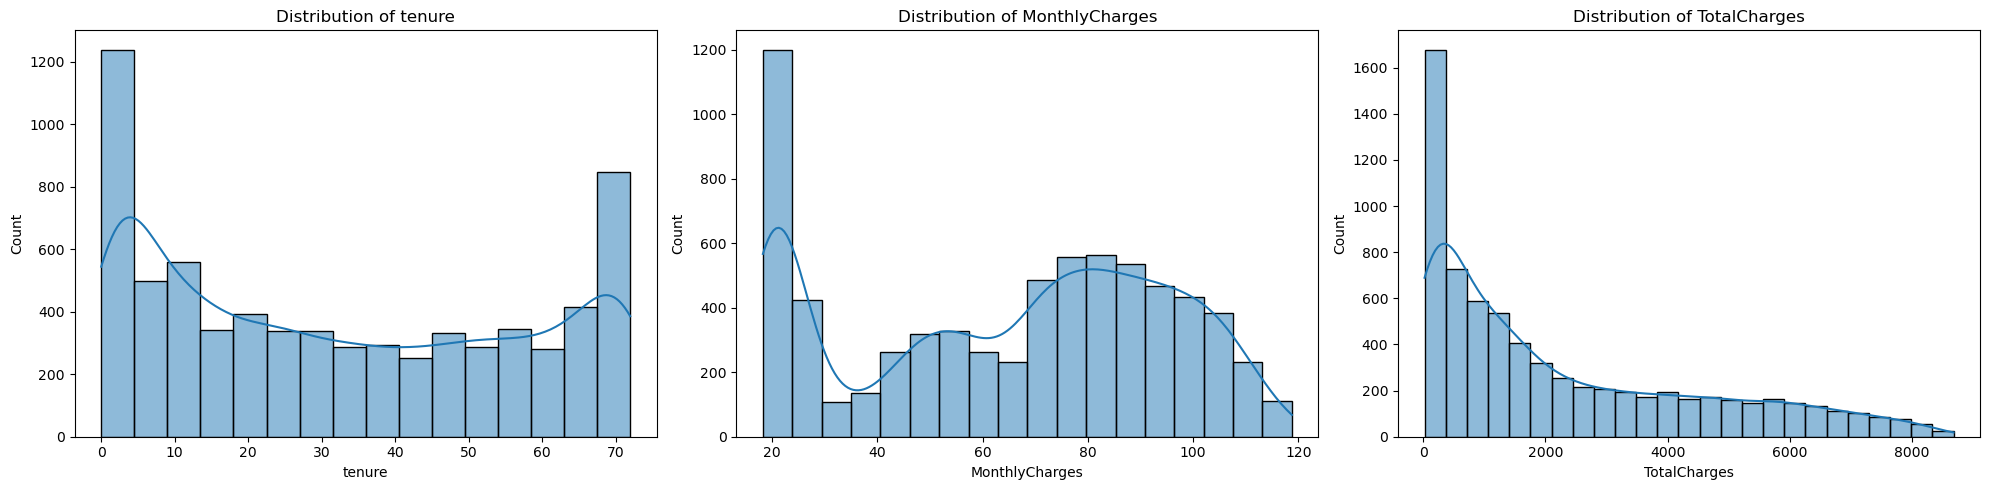

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, var in enumerate(numerical_vars):
    sns.histplot(churn_df[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

In [11]:
# # 3. Interaction between 'tenure' and 'MonthlyCharges'
# churn_df['TotalSpend'] = churn_df['tenure'] * churn_df['MonthlyCharges']

# # 4. Average monthly spend
# churn_df['AvgMonthlySpend'] = churn_df['TotalCharges'] / churn_df['tenure']
# churn_df['AvgMonthlySpend'] = churn_df['AvgMonthlySpend'].fillna(0)  # Handle division by zero if tenure is 0

In [12]:
len(churn_df.columns)

19

In [13]:
churn_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'PhoneServiceLines'],
      dtype='object')

In [53]:
print(churn_df.dtypes)

tenure                                   float64
Contract                                   int32
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int32
PhoneServiceLines                          int64
Dependents_Yes                           float64
DeviceProtection_No internet service     float64
DeviceProtection_Yes                     float64
InternetService_Fiber optic              float64
InternetService_No                       float64
OnlineBackup_No internet service         float64
OnlineBackup_Yes                         float64
OnlineSecurity_No internet service       float64
OnlineSecurity_Yes                       float64
PaperlessBilling_Yes                     float64
Partner_Yes                              float64
PaymentMethod_Credit card (automatic)    float64
PaymentMethod_Electronic check           float64
PaymentMethod_Mailed check               float64
SeniorCitizen_1     

In [15]:
exclude_columns = ['Churn']
categorical_columns = churn_df.select_dtypes(include=['object']).columns.difference(exclude_columns)
categorical_columns

Index(['Contract', 'Dependents', 'DeviceProtection', 'InternetService',
       'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling', 'Partner',
       'PaymentMethod', 'SeniorCitizen', 'StreamingMovies', 'StreamingTV',
       'TechSupport', 'gender'],
      dtype='object')

In [16]:
# Filter categorical columns
categorical_columns = churn_df.select_dtypes(include=['object'])

# Find unique values for each categorical column
unique_values = {col: churn_df[col].unique() for col in categorical_columns.columns}

# Print unique values
for col, values in unique_values.items():
    print(f"Unique values in column '{col}': {values}")

Unique values in column 'gender': ['Male' 'Female']
Unique values in column 'SeniorCitizen': ['0' '1']
Unique values in column 'Partner': ['No' 'Yes']
Unique values in column 'Dependents': ['No' 'Yes']
Unique values in column 'InternetService': ['Fiber optic' 'DSL' 'No']
Unique values in column 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Unique values in column 'OnlineBackup': ['Yes' 'No internet service' 'No']
Unique values in column 'DeviceProtection': ['No' 'No internet service' 'Yes']
Unique values in column 'TechSupport': ['No' 'Yes' 'No internet service']
Unique values in column 'StreamingTV': ['Yes' 'No' 'No internet service']
Unique values in column 'StreamingMovies': ['Yes' 'No' 'No internet service']
Unique values in column 'Contract': ['Month-to-month' 'Two year' 'One year']
Unique values in column 'PaperlessBilling': ['Yes' 'No']
Unique values in column 'PaymentMethod': ['Credit card (automatic)' 'Electronic check' 'Bank transfer (automatic)'
 'Mailed check']
Uniqu

In [17]:
from sklearn.preprocessing import OneHotEncoder

# Identify the columns to exclude from One-Hot Encoding
exclude_columns = ['Churn', 'Contract']

# Identify categorical columns (excluding 'CustomerID' and 'Churn')
categorical_columns = churn_df.select_dtypes(include=['object']).columns.difference(exclude_columns)

# Initialize the OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Apply One-Hot Encoding to the categorical columns
encoded_data = one_hot_encoder.fit_transform(churn_df[categorical_columns])

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns from the DataFrame
churn_df = churn_df.drop(columns=categorical_columns)

# Concatenate the original DataFrame with the encoded DataFrame
df_encoded = pd.concat([churn_df, encoded_df], axis=1)

# Display the first few rows of the encoded DataFrame
df_encoded.head()


,tenure,Contract,MonthlyCharges,TotalCharges,Churn,PhoneServiceLines,Dependents_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,InternetService_Fiber optic,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No internet service,TechSupport_Yes,gender_Male
0,9.0,Month-to-month,99.30,918.75,No,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,57.0,Two year,59.75,3450.15,No,2,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,71.0,Two year,25.45,1813.35,No,1,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,4.0,Month-to-month,40.05,162.45,No,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,30.0,Month-to-month,64.50,1888.45,No,1,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [18]:
len(df_encoded.columns)

28

In [19]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to the 'Churn' column
label_encoder = LabelEncoder()
df_encoded['Churn'] = label_encoder.fit_transform(df_encoded['Churn'])
df_encoded['Contract'] = label_encoder.fit_transform(df_encoded['Contract'])

In [20]:
df_encoded.head(5)

,tenure,Contract,MonthlyCharges,TotalCharges,Churn,PhoneServiceLines,Dependents_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,InternetService_Fiber optic,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No internet service,TechSupport_Yes,gender_Male
0,9.0,0,99.30,918.75,0,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,57.0,2,59.75,3450.15,0,2,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,71.0,2,25.45,1813.35,0,1,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,4.0,0,40.05,162.45,0,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,30.0,0,64.50,1888.45,0,1,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [52]:
print(df_encoded.dtypes)

tenure                                   float64
Contract                                   int32
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int32
PhoneServiceLines                          int64
Dependents_Yes                           float64
DeviceProtection_No internet service     float64
DeviceProtection_Yes                     float64
InternetService_Fiber optic              float64
InternetService_No                       float64
OnlineBackup_No internet service         float64
OnlineBackup_Yes                         float64
OnlineSecurity_No internet service       float64
OnlineSecurity_Yes                       float64
PaperlessBilling_Yes                     float64
Partner_Yes                              float64
PaymentMethod_Credit card (automatic)    float64
PaymentMethod_Electronic check           float64
PaymentMethod_Mailed check               float64
SeniorCitizen_1     

### Apply Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target (y)
X = df_encoded.drop('Churn', axis=1)  # Assuming 'Churn' is the target variable
y = df_encoded['Churn']

# Apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Checking for the imbalance data.

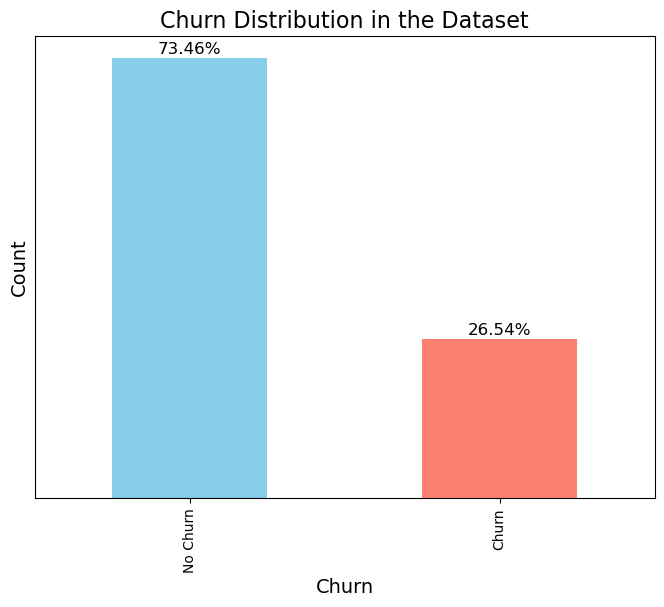

In [46]:
import matplotlib.pyplot as plt

# Calculate the class distribution and percentages
class_counts = df_encoded['Churn'].value_counts()
class_percentages = class_counts / class_counts.sum() * 100

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])

# Add title and labels
plt.title('Churn Distribution in the Dataset', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add percentage labels on top of the bars
for i, percentage in enumerate(class_percentages):
    plt.text(i, class_counts[i] + 50, f'{percentage:.2f}%', ha='center', fontsize=12)

# Hide y-axis ticks
plt.yticks([])

# Show the plot
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.show()


### Apply SMOTE 

In [48]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


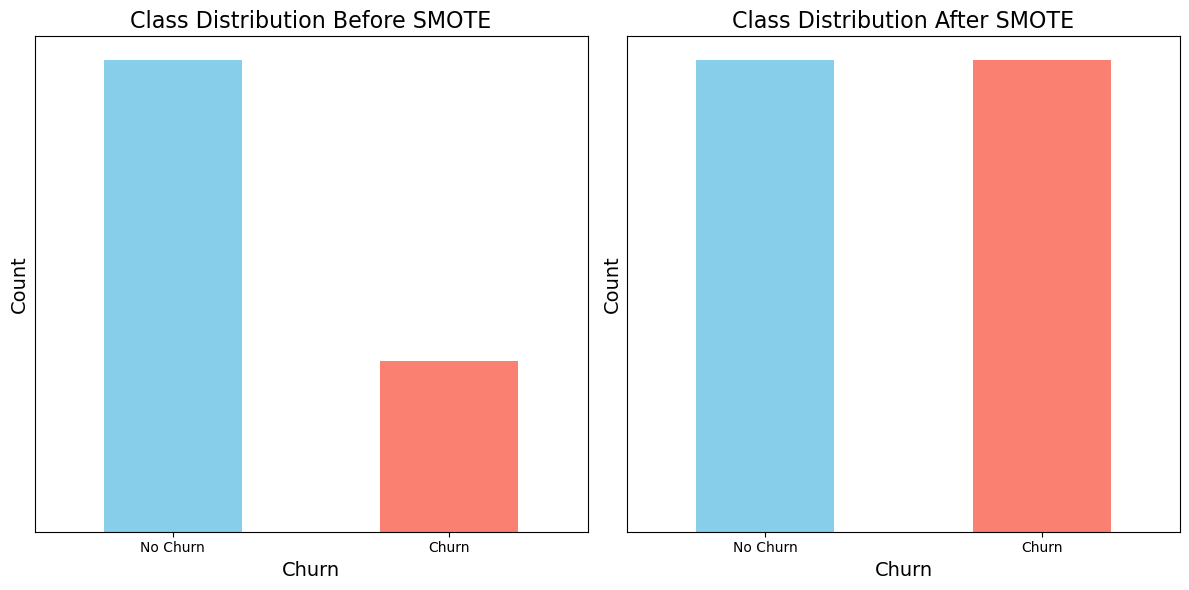

In [49]:
# Plotting the class distribution before and after SMOTE
class_counts_before = y.value_counts()
class_counts_after = y_smote.value_counts()

# Plot the class distribution
plt.figure(figsize=(12, 6))

# Plot for class distribution before SMOTE
plt.subplot(1, 2, 1)
class_counts_before.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution Before SMOTE', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'], rotation=0)
plt.yticks([])  # Hide y-axis ticks

# Plot for class distribution after SMOTE
plt.subplot(1, 2, 2)
class_counts_after.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution After SMOTE', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'], rotation=0)
plt.yticks([])  # Hide y-axis ticks

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Apply PCA on the given data

In [25]:
from sklearn.decomposition import PCA


# Apply PCA with the optimal number of components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_smote)

# Display the shape of the transformed data
print(f"Original number of features: {X_smote.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca.shape[1]}")

print(sum(pca.explained_variance_ratio_))

Original number of features: 27
Reduced number of features after PCA: 10
0.9999997479045715


## Logastic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import classification_report, f1_score

# Assuming X_pca is your PCA-transformed feature set and y_smote is your target variable
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_smote, test_size=0.3, random_state=42)

# Logistic Regression
lr_model = LogisticRegression()
lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_param_grid, cv=kfold, scoring='f1', n_jobs=-1, verbose=3)
lr_grid_search.fit(X_train, y_train)

best_lr_model = lr_grid_search.best_estimator_

y_pred_lr = best_lr_model.predict(X_test)
f1_lr = f1_score(y_test, y_pred_lr)
print(f"Logistic Regression F1 Score: {f1_lr:.4f}")
print("Best Parameters:", lr_grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Logistic Regression F1 Score: 0.7968
Best Parameters: {'C': 0.1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78      1560
           1       0.77      0.83      0.80      1545

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



## Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score


# Random Forest
rf_model = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [30, 40, 50],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 7]
}

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=kfold, scoring='f1', n_jobs=-1, verbose=3)
rf_grid_search.fit(X_train, y_train)

best_rf_model = rf_grid_search.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest F1 Score: {f1_rf:.4f}")
print("Best Parameters:", rf_grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Random Forest F1 Score: 0.8363
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1560
           1       0.83      0.84      0.84      1545

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=kfold, scoring='f1', n_jobs=-1, verbose=3)
dt_grid_search.fit(X_train, y_train)

best_dt_model = dt_grid_search.best_estimator_

y_pred_dt = best_dt_model.predict(X_test)
f1_dt = f1_score(y_test, y_pred_dt)
print(f"Decision Tree F1 Score: {f1_dt:.4f}")
print("Best Parameters:", dt_grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Decision Tree F1 Score: 0.7981
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79      1560
           1       0.78      0.81      0.80      1545

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



## K-Nearest Neighbors (KNN)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, cv=kfold, scoring='f1', n_jobs=-1, verbose=3)
knn_grid_search.fit(X_train, y_train)

best_knn_model = knn_grid_search.best_estimator_

y_pred_knn = best_knn_model.predict(X_test)
f1_knn = f1_score(y_test, y_pred_knn)
print(f"KNN F1 Score: {f1_knn:.4f}")
print("Best Parameters:", knn_grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
KNN F1 Score: 0.8052
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.72      0.78      1560
           1       0.75      0.86      0.81      1545

    accuracy                           0.79      3105
   macro avg       0.80      0.79      0.79      3105
weighted avg       0.80      0.79      0.79      3105



## Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)
f1_nb = f1_score(y_test, y_pred_nb)
print(f"Naive Bayes F1 Score: {f1_nb:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes F1 Score: 0.7541

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      1560
           1       0.74      0.77      0.75      1545

    accuracy                           0.75      3105
   macro avg       0.75      0.75      0.75      3105
weighted avg       0.75      0.75      0.75      3105



## Voting classifier

In [37]:
from sklearn.ensemble import VotingClassifier

# Combine Logistic Regression, Random Forest, and Gradient Boosting
voting_model = VotingClassifier(
    estimators=[
        ('lr', best_lr_model),  # Logistic Regression from previous grid search
        ('rf', rf_model),       # Random Forest
        ('gb', gb_model)        # Gradient Boosting
    ],
    voting='soft'  # 'soft' for probability-based voting, 'hard' for majority vote
)

voting_model.fit(X_train, y_train)

y_pred_voting = voting_model.predict(X_test)
f1_voting = f1_score(y_test, y_pred_voting)
print(f"Voting Classifier F1 Score: {f1_voting:.4f}")
print("\nVoting Classifier Classification Report:\n", classification_report(y_test, y_pred_voting))

Voting Classifier F1 Score: 0.8335

Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1560
           1       0.82      0.85      0.83      1545

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



## Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
f1_gb = f1_score(y_test, y_pred_gb)
print(f"Gradient Boosting F1 Score: {f1_gb:.4f}")
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting F1 Score: 0.8168

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1560
           1       0.81      0.83      0.82      1545

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



In [34]:
from sklearn.ensemble import VotingClassifier

# Combine Logistic Regression, Random Forest, and Gradient Boosting
voting_model = VotingClassifier(
    estimators=[
        ('lr', lr_model),  # Logistic Regression
        ('rf', rf_model),  # Random Forest
        ('gb', gb_model)   # Gradient Boosting
    ],
    voting='soft'  # 'soft' for probability-based voting, 'hard' for majority vote
)

voting_model.fit(X_train, y_train)

y_pred_voting = voting_model.predict(X_test)
f1_voting = f1_score(y_test, y_pred_voting)
print(f"Voting Classifier F1 Score: {f1_voting:.4f}")
print("\nVoting Classifier Classification Report:\n", classification_report(y_test, y_pred_voting))

Voting Classifier F1 Score: 0.8298

Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82      1560
           1       0.81      0.85      0.83      1545

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



## Support vector classifier (SVC)

In [35]:
from sklearn.svm import SVC

# Support Vector Machine
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
f1_svm = f1_score(y_test, y_pred_svm)
print(f"SVM F1 Score: {f1_svm:.4f}")
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM F1 Score: 0.6962

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70      1560
           1       0.70      0.70      0.70      1545

    accuracy                           0.70      3105
   macro avg       0.70      0.70      0.70      3105
weighted avg       0.70      0.70      0.70      3105



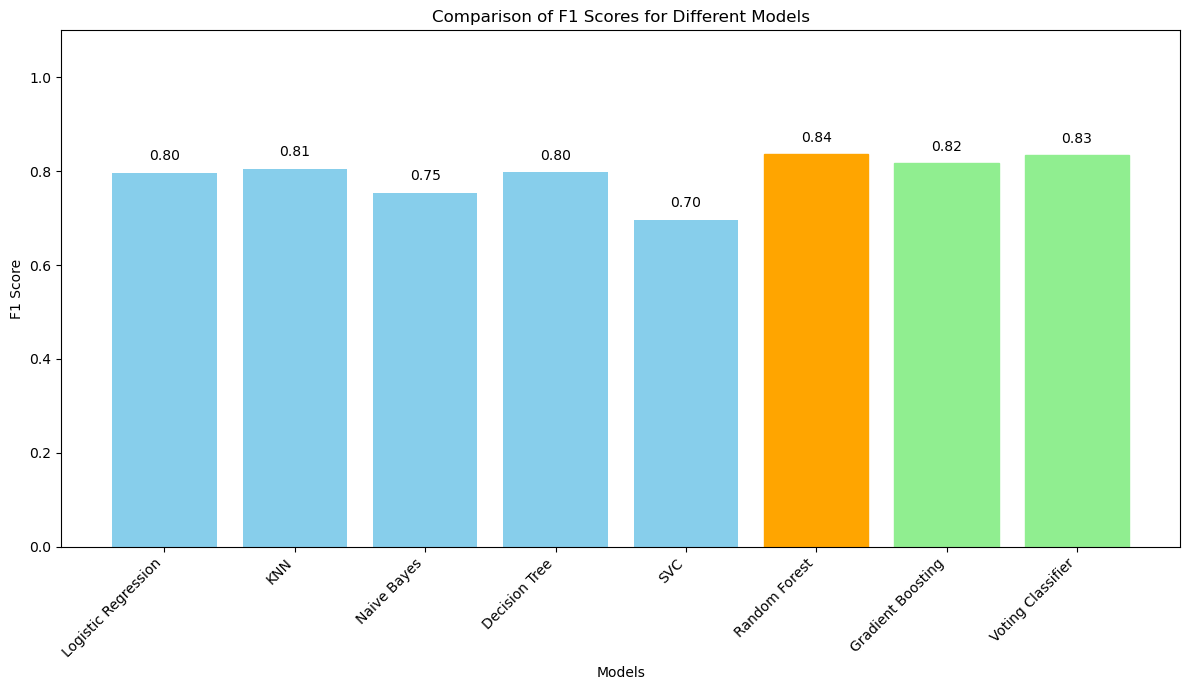

In [42]:
import matplotlib.pyplot as plt

# F1 scores of different models
models = ['Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'SVC', 'Random Forest', 'Gradient Boosting', 'Voting Classifier']
f1_scores = [f1_lr, f1_knn, f1_nb, f1_dt, f1_svm, f1_rf, f1_gb, f1_voting]

# Create a bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(models, f1_scores, color='skyblue')

# Highlight the top 3 models
top_indices = sorted(range(len(f1_scores)), key=lambda i: f1_scores[i], reverse=True)[:3]
for i in top_indices:
    bars[i].set_color('lightgreen')

# Highlight the top model
top_index = f1_scores.index(max(f1_scores))
bars[top_index].set_color('orange')

# Annotate F1 scores on the bars
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{score:.2f}', 
             ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores for Different Models')
plt.ylim(0, 1.1)  # Extend y-axis limit slightly for better text visibility

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
from joblib import dump, load

# Assuming you have your models defined as variables
# and have identified the best model and its corresponding F1 score.

# Example: best_model is the model with the highest F1 score
best_model =  rf_model 

# Save the best model to a file
dump(best_model, 'best_model.joblib')

print("Best model saved as 'best_model.joblib'")

In [ ]:
# Load the saved model
loaded_model = load('best_model.joblib')

# Use the loaded model for predictions
# predictions = loaded_model.predict(X_test)